In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow

In [3]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df = pd.read_csv('mr/sst5.csv', encoding='unicode_escape', header=0)

In [4]:
df.head(5)

,sentiment,review
0,4,lovely film lovely performance buy accorsi
1,3,one go unindicted probably best
2,4,not nearly moved tear couple scene got ice wat...
3,5,warm funny engaging film
4,5,us sharp humor insight human nature examine cl...


In [5]:
df.head(5)

,sentiment,review
0,4,lovely film lovely performance buy accorsi
1,3,one go unindicted probably best
2,4,not nearly moved tear couple scene got ice wat...
3,5,warm funny engaging film
4,5,us sharp humor insight human nature examine cl...


In [108]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [109]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [110]:
import pandas as pd

In [275]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/sst5.csv', encoding='unicode_escape', header=0)
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('mr/train-sst5.csv', index=False)
test.to_csv('mr/test-sst5.csv', index=False)

In [276]:
train_df = pd.read_csv("mr/train-sst5.csv", encoding='unicode_escape', header=0)

In [277]:
train_df

,sentiment,review
0,2,people want ol ballandchain want ball chain
1,4,washington strong hand keen eye sweet spirit g...
2,0,lazy filmmaking director taking handsoff appro...
3,3,mostly intelligent engrossing psychologically ...
4,4,substitute onscreen chemistry friel pull strin...
...,...,...
10660,1,question determine well schmaltz manufactured ...
10661,1,vampire thriller blade ii start wild hoot suck...
10662,3,strangely come kingdom mild wild
10663,2,blue lagoon


In [278]:
train_df.iloc[0][1]

'people want ol ballandchain want ball chain'

In [279]:
test_df = pd.read_csv("mr/test-sst5.csv", encoding='unicode_escape', header=0)

In [280]:
test_df.shape

(1185, 2)

In [281]:
test_df.head()

,sentiment,review
0,3,otherwise intense twistandturn thriller certai...
1,3,format get used best capture dizzying height a...
2,3,good film glum
3,2,sheer selfish woundlicking barscrapping dogged...
4,4,belongs daniel daylewis much belongs martin sc...


In [282]:
train_df['sentiment'] = (train_df['sentiment']).astype(int)
test_df['sentiment'] = (test_df['sentiment']).astype(int)
train_df['review'] = (train_df['review']).astype(str)
test_df['review'] = (test_df['review']).astype(str)
train_df.head(30)

,sentiment,review
0,2,people want ol ballandchain want ball chain
1,4,washington strong hand keen eye sweet spirit g...
2,0,lazy filmmaking director taking handsoff appro...
3,3,mostly intelligent engrossing psychologically ...
4,4,substitute onscreen chemistry friel pull strin...
5,1,script le spice rat burger rock fighting skill...
6,1,film strictly routine
7,4,writing clever cast appealing
8,0,make say obvious abandon hope good movie ye enter
9,2,simply portrait early extreme sport peek skate...


In [283]:
test_df.head()

,sentiment,review
0,3,otherwise intense twistandturn thriller certai...
1,3,format get used best capture dizzying height a...
2,3,good film glum
3,2,sheer selfish woundlicking barscrapping dogged...
4,4,belongs daniel daylewis much belongs martin sc...


In [284]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,2,people want ol ballandchain want ball chain
1,1,4,washington strong hand keen eye sweet spirit g...
2,2,0,lazy filmmaking director taking handsoff appro...
3,3,3,mostly intelligent engrossing psychologically ...
4,4,4,substitute onscreen chemistry friel pull strin...


In [285]:
train_df_bert

,id,label,sentence
0,0,2,people want ol ballandchain want ball chain
1,1,4,washington strong hand keen eye sweet spirit g...
2,2,0,lazy filmmaking director taking handsoff appro...
3,3,3,mostly intelligent engrossing psychologically ...
4,4,4,substitute onscreen chemistry friel pull strin...
...,...,...,...
10660,10660,1,question determine well schmaltz manufactured ...
10661,10661,1,vampire thriller blade ii start wild hoot suck...
10662,10662,3,strangely come kingdom mild wild
10663,10663,2,blue lagoon


In [286]:
train_df_bert = train_df_bert.iloc[0:10000]

In [287]:
train_df_bert

,id,label,sentence
0,0,2,people want ol ballandchain want ball chain
1,1,4,washington strong hand keen eye sweet spirit g...
2,2,0,lazy filmmaking director taking handsoff appro...
3,3,3,mostly intelligent engrossing psychologically ...
4,4,4,substitute onscreen chemistry friel pull strin...
...,...,...,...
9995,9995,4,compellingly watchable
9996,9996,1,action scene thing fall apart
9997,9997,2,holm terrific men hjejle quite appealing film ...
9998,9998,4,swimming young woman face casting actress whos...


In [288]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,3,otherwise intense twistandturn thriller certai...
1,1,3,format get used best capture dizzying height a...
2,2,3,good film glum
3,3,2,sheer selfish woundlicking barscrapping dogged...
4,4,4,belongs daniel daylewis much belongs martin sc...


In [289]:
test_df_bert = test_df_bert.iloc[0:3000]

In [290]:
test_df_bert

,id,label,sentence
0,0,3,otherwise intense twistandturn thriller certai...
1,1,3,format get used best capture dizzying height a...
2,2,3,good film glum
3,3,2,sheer selfish woundlicking barscrapping dogged...
4,4,4,belongs daniel daylewis much belongs martin sc...
...,...,...,...
1180,1180,0,awfully derivative story
1181,1181,4,work smoothly direction spielberg convincing i...
1182,1182,3,cho continues exploration outer limit raunch c...
1183,1183,1,everything serious poetic earnest sadly dull


In [291]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [292]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [293]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [294]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  washington strong hand keen eye sweet spirit good taste reflected almost every scene
Tokenized:  ['washington', 'strong', 'hand', 'keen', 'eye', 'sweet', 'spirit', 'good', 'taste', 'reflected', 'almost', 'every', 'scene']
Token IDs:  [2899, 2844, 2192, 10326, 3239, 4086, 4382, 2204, 5510, 7686, 2471, 2296, 3496]


In [295]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  42


In [296]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  41


In [297]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 50,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  people want ol ballandchain want ball chain
Token IDs: tensor([  101,  2111,  2215, 19330,  3608,  5685, 24925,  2078,  2215,  3608,
         4677,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [298]:

train_df_bert.head()

,id,label,sentence
0,0,2,people want ol ballandchain want ball chain
1,1,4,washington strong hand keen eye sweet spirit g...
2,2,0,lazy filmmaking director taking handsoff appro...
3,3,3,mostly intelligent engrossing psychologically ...
4,4,4,substitute onscreen chemistry friel pull strin...


In [299]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [300]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [301]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 50

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 50)
X_test shape: (1185, 50)


In [302]:
from keras import backend as K
from tensorflow import keras
import tensorflow as tf

class FuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_centers=None,
                 initial_sigmas=None, 
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_centers = initial_centers
        self.initial_sigmas = initial_sigmas
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        c_init_values =[]
        
        if self.initial_centers is None:
            c_init_values= tf.random_uniform_initializer(-1, 1)(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            c_init_values =tf.convert_to_tensor(self.initial_centers, dtype="float32")
        self.c = tf.Variable(initial_value= c_init_values, trainable=True)

        a_init_values = []
        if self.initial_sigmas is None:
            a_init_values = tf.ones_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            a_init_values = tf.convert_to_tensor(self.initial_sigmas, dtype="float32")
        self.a = tf.Variable(initial_value= a_init_values, trainable=True)
        super(FuzzyLayer, self).build(input_shape)  

    def call(self, x):
        
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_c = self.c
        aligned_a = self.a
        for dim in self.input_dimensions:
            aligned_c = K.repeat_elements(K.expand_dims(aligned_c, 0), dim, 0)
            aligned_a = K.repeat_elements(K.expand_dims(aligned_a, 0), dim, 0)

        xc = K.exp(-K.sum(K.square((aligned_x - aligned_c) / (2 * aligned_a)), axis=-2, keepdims=False))
        
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)


In [303]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

class DefuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_rules_outcomes=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_rules_outcomes = initial_rules_outcomes
        super(DefuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        outcomes_init_values = []
        if self.initial_rules_outcomes is None:
            outcomes_init_values = tf.random_uniform_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            outcomes_init_values = tf.convert_to_tensor(self.initial_rules_outcomes, dtype="float32")
        
        self.rules_outcome = tf.Variable(initial_value = outcomes_init_values, trainable=True)
        
        super(DefuzzyLayer, self).build(input_shape)  

    def call(self, x):
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_rules_outcome = self.rules_outcome
        for dim in self.input_dimensions:
            aligned_rules_outcome = K.repeat_elements(K.expand_dims(aligned_rules_outcome, 0), dim, 0)
        
        xc = K.sum((aligned_x * aligned_rules_outcome), axis=-2, keepdims=False)
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)
    
    def get_config(self):
        return {"rules_outcome": self.rules_outcome.numpy()}


In [304]:

import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
import torch.optim as optim
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32
hidden_dims = 40

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 50, 32)            64000     
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 50, 32)            5152      
_________________________________________________________________
dropout_77 (Dropout)         (None, 50, 32)            0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 50, 32)            4128      
_________________________________________________________________
dropout_78 (Dropout)         (None, 50, 32)            0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 50, 32)            3104      
_________________________________________________________________
dropout_79 (Dropout)         (None, 50

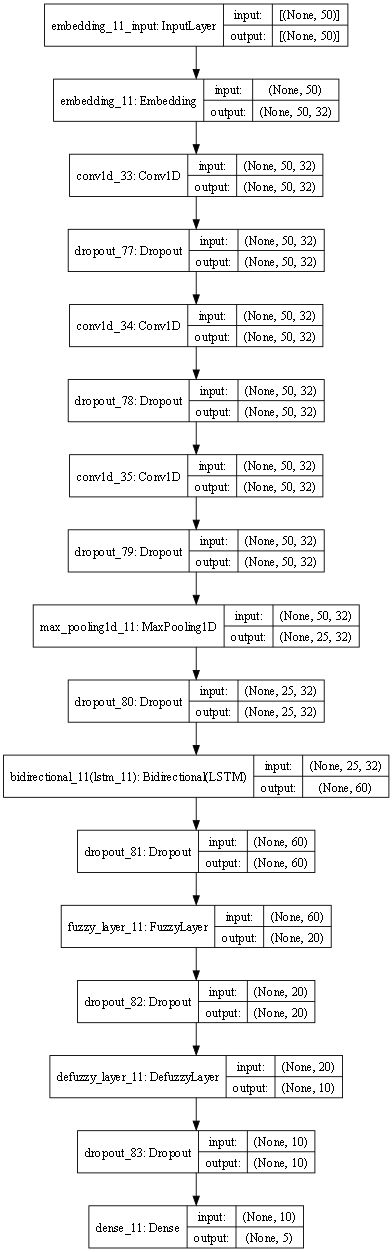

In [305]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [308]:
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
900/900 [==============================] - 12s 13ms/step - loss: 1.2349 - accuracy: 0.4840 - val_loss: 1.2592 - val_accuracy: 0.4720
Epoch 2/20
900/900 [==============================] - 11s 12ms/step - loss: 1.1906 - accuracy: 0.5023 - val_loss: 1.2821 - val_accuracy: 0.4590
Epoch 3/20
900/900 [==============================] - 11s 12ms/step - loss: 1.1380 - accuracy: 0.5309 - val_loss: 1.3102 - val_accuracy: 0.4840
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.0300 - accuracy: 0.5796
Training Accuracy: 0.579600
Training Loss: 1.029962
38/38 [==============================] - 0s 6ms/step - loss: 2.4074 - accuracy: 0.2515
Testing Accuracy:  0.251477
Testing Loss:  2.407433


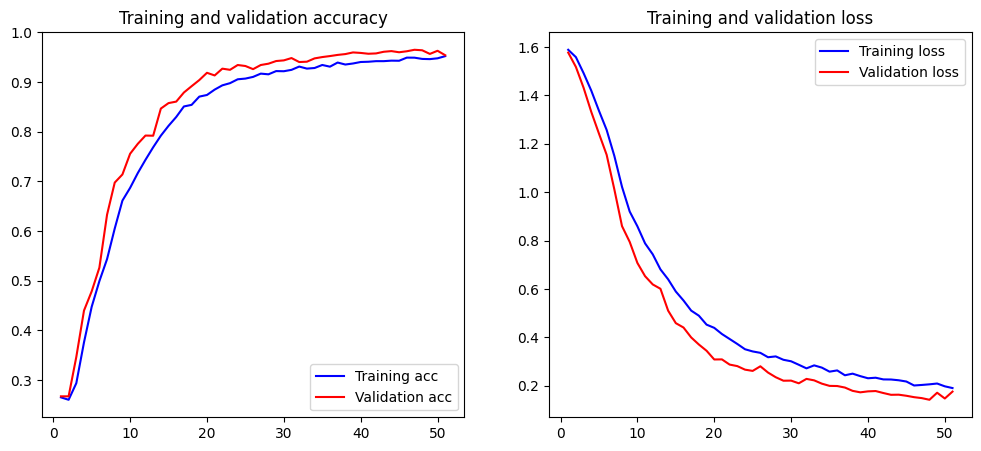

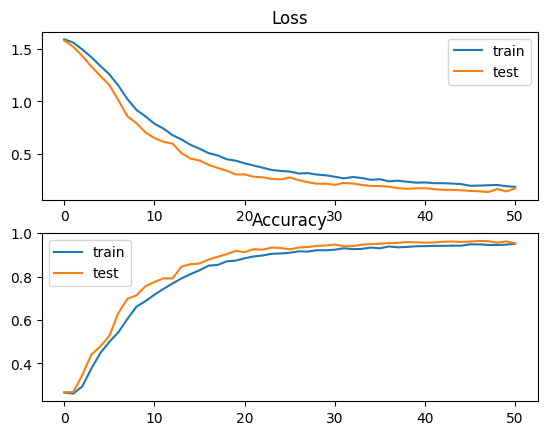

In [242]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()